# All Subjects ERPs Analysis

## Load data and perform piperline for all subjects

In [1]:
%%capture

import sys
sys.path.append("..")

import mne
from mne_bids import BIDSPath, read_raw_bids
from src.utils import load_subject, pipeline
from matplotlib import pyplot as plt

# Set BIDS path
bids_path = BIDSPath(root='../data', task='jacobsen', suffix='eeg')

# List of all subject BIDS path
all_sub_paths = bids_path.match()

# Create dictionary to store individual subject ephochs and evoked
sub_epochs = {'regular': [], 'random': []}
sub_evoked = {'regular': [], 'random': []}


for sub_path in all_sub_paths:
        # Load data
        raw = load_subject(sub_path)

        # Execute filtering + cleaning data pipeline
        raw, epochs = pipeline(
            raw,
            tmin = -1,
            tmax = 1,
            reject_amp = 100e-6, #±μ100
            drop_bad = True,
            perform_ica = False # ICA doesn't drop any componens
        )

        # Save individual subject epochs and evoked
        sub_epochs['regular'].append(epochs['regular'])
        sub_epochs['random'].append(epochs['random'])
        sub_evoked['regular'].append(epochs['regular'].average())
        sub_evoked['random'].append(epochs['random'].average())


## Save ERP's plots for every subject

sub-001
combining channels using "mean"
combining channels using "mean"


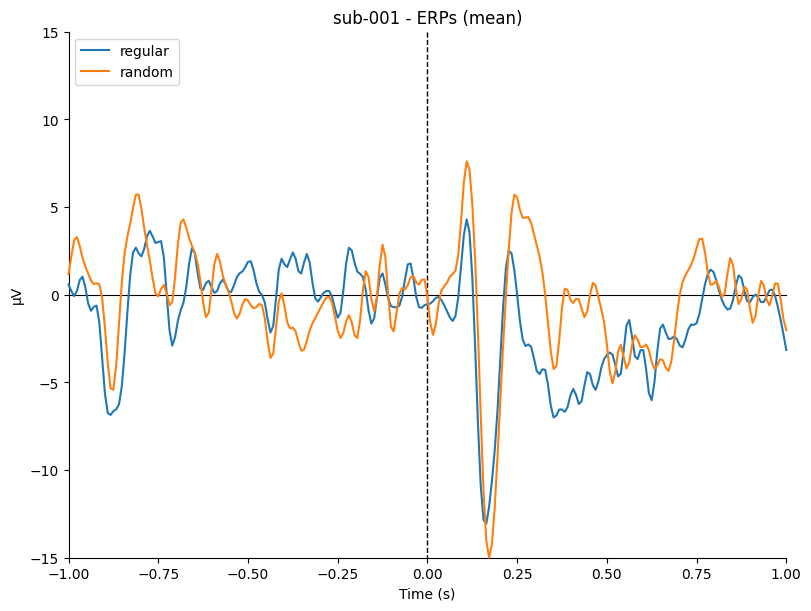

sub-002
combining channels using "mean"
combining channels using "mean"


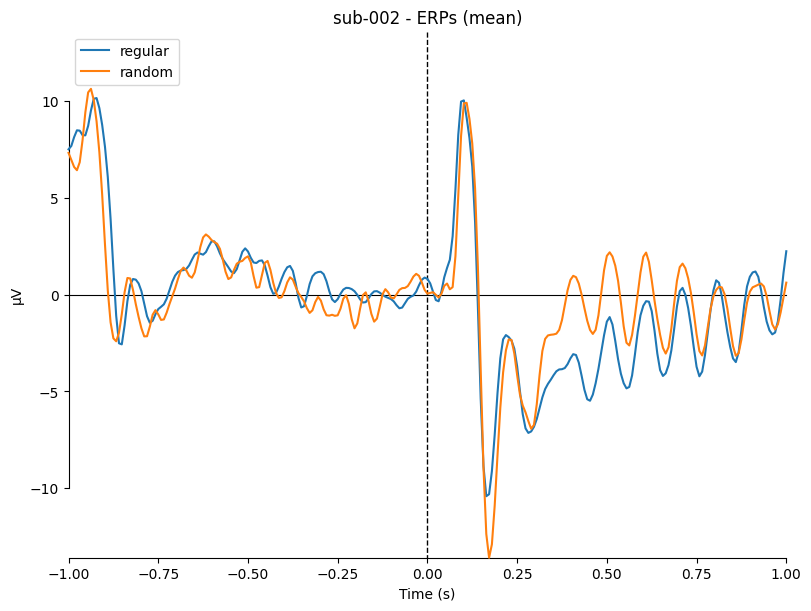

sub-003
combining channels using "mean"
combining channels using "mean"


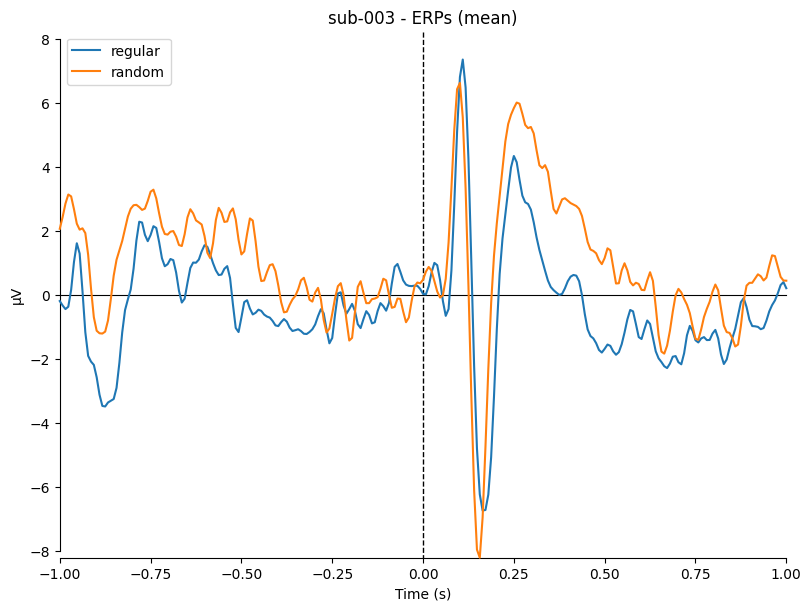

sub-004
combining channels using "mean"
combining channels using "mean"


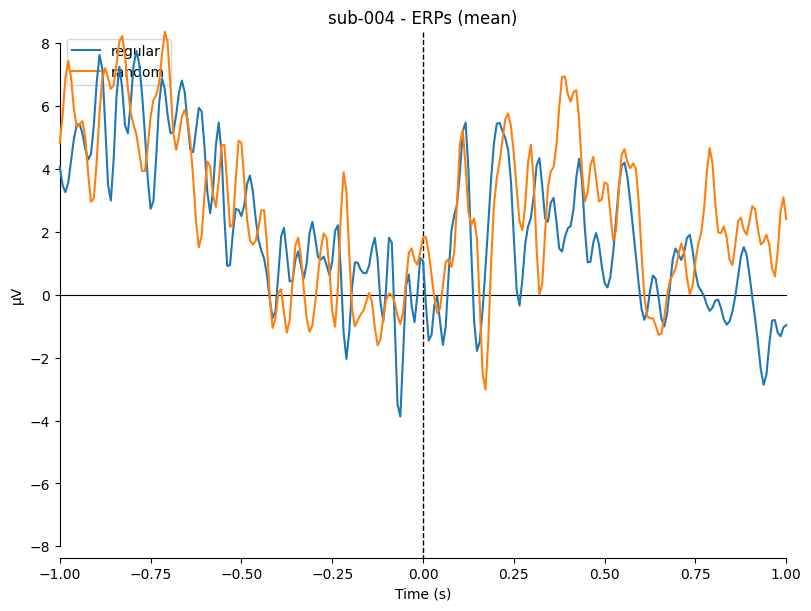

sub-005
combining channels using "mean"
combining channels using "mean"


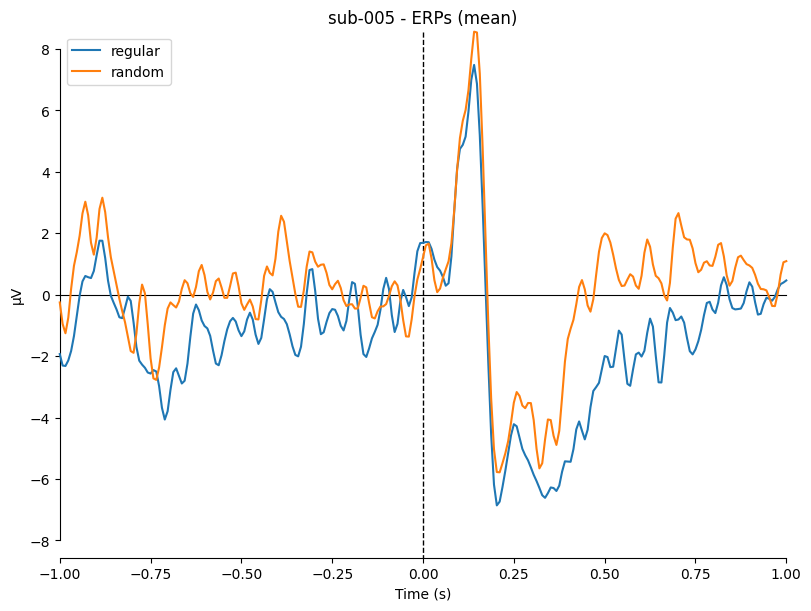

sub-006
combining channels using "mean"
combining channels using "mean"


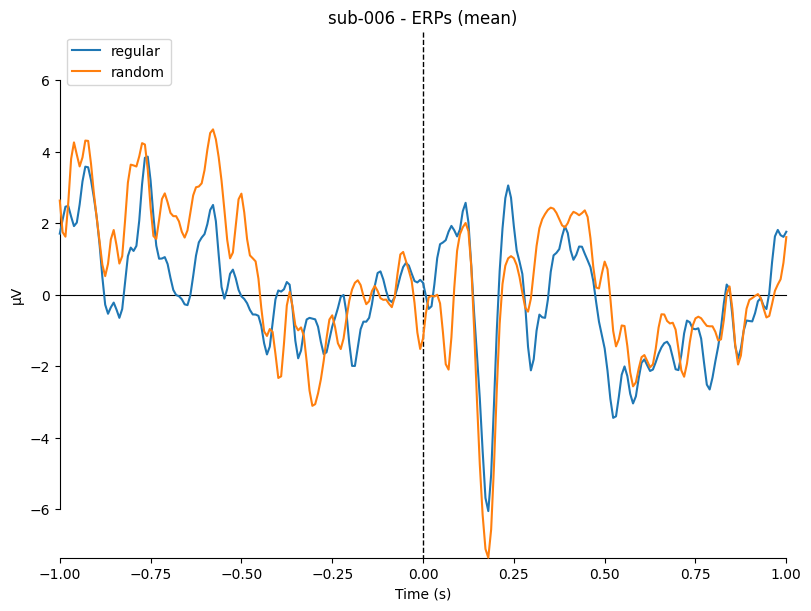

sub-007
combining channels using "mean"
combining channels using "mean"


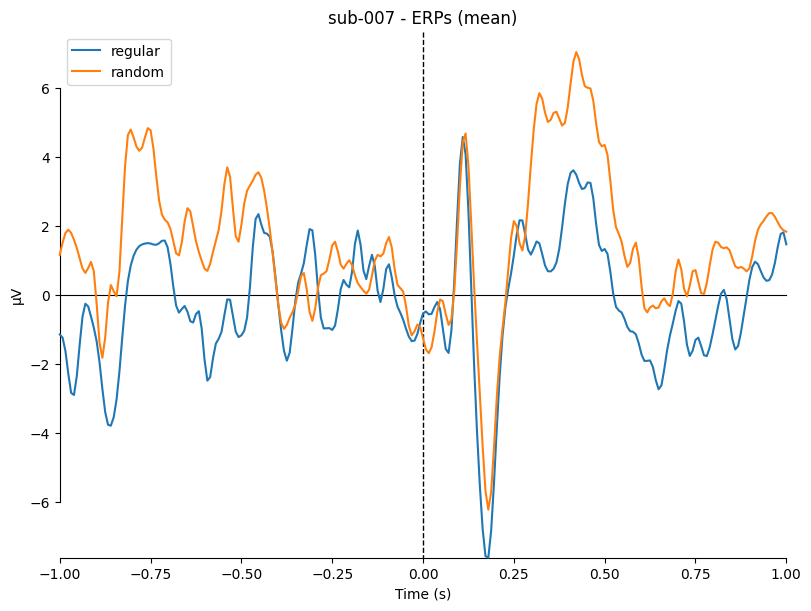

sub-008
combining channels using "mean"
combining channels using "mean"


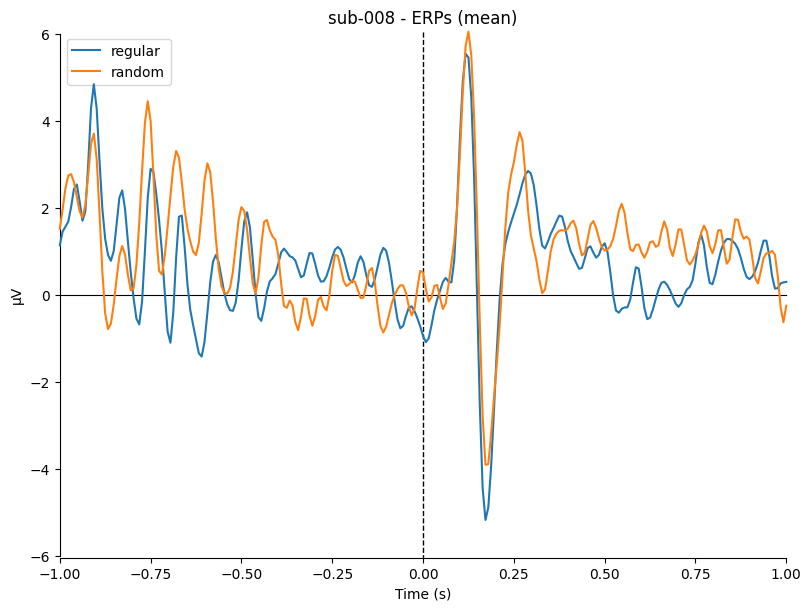

sub-009
combining channels using "mean"
combining channels using "mean"


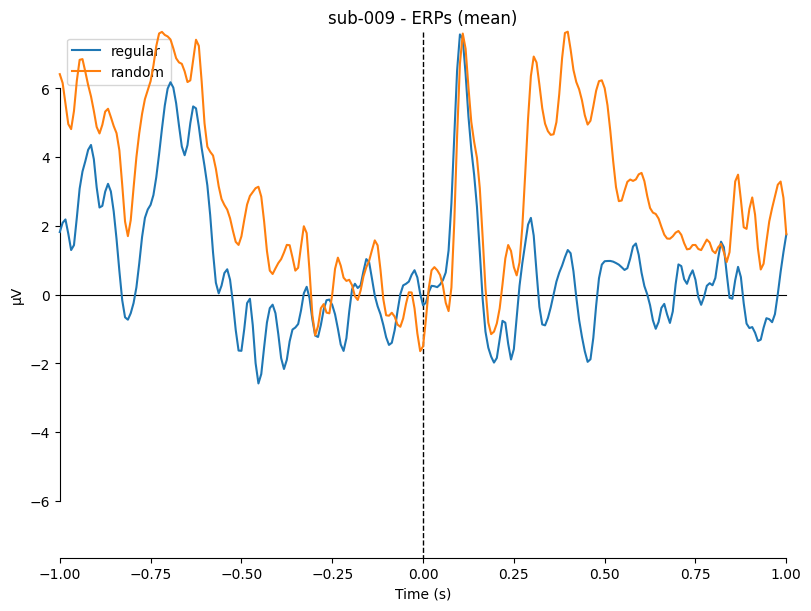

sub-010
combining channels using "mean"
combining channels using "mean"


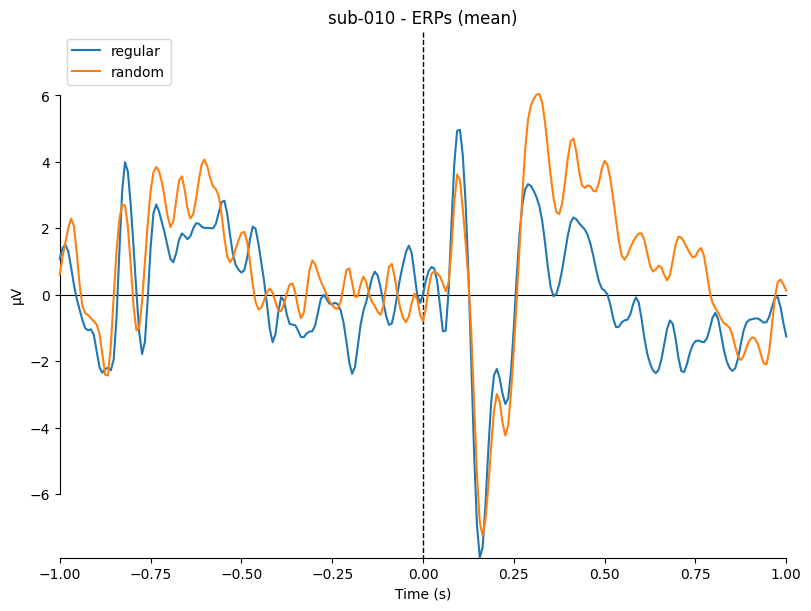

sub-011
combining channels using "mean"
combining channels using "mean"


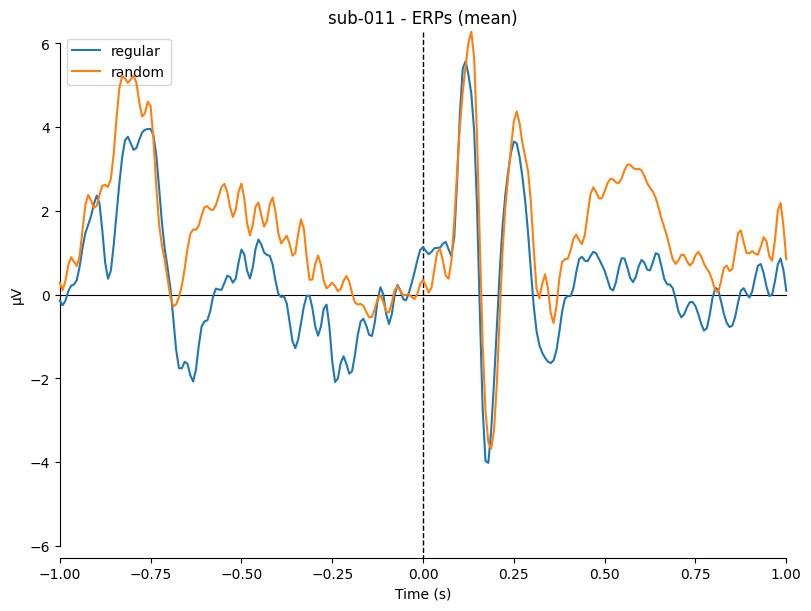

sub-012
combining channels using "mean"
combining channels using "mean"


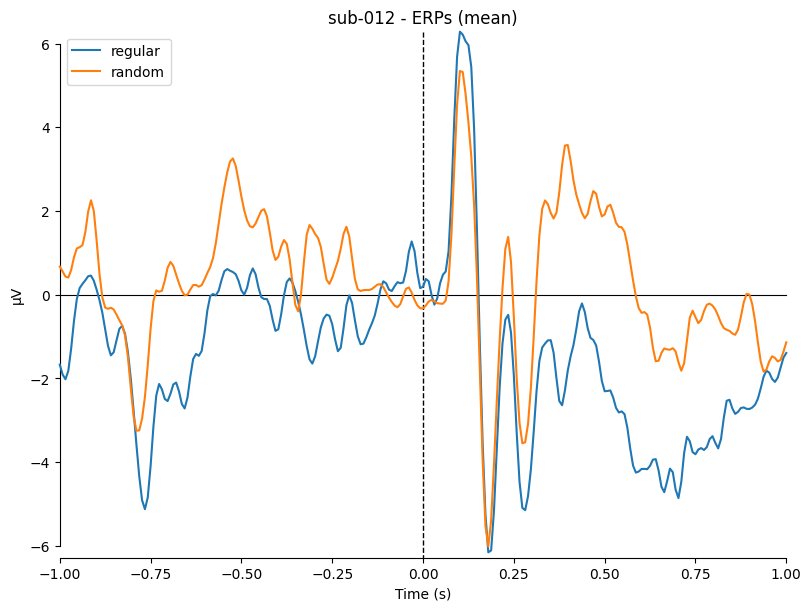

sub-013
combining channels using "mean"
combining channels using "mean"


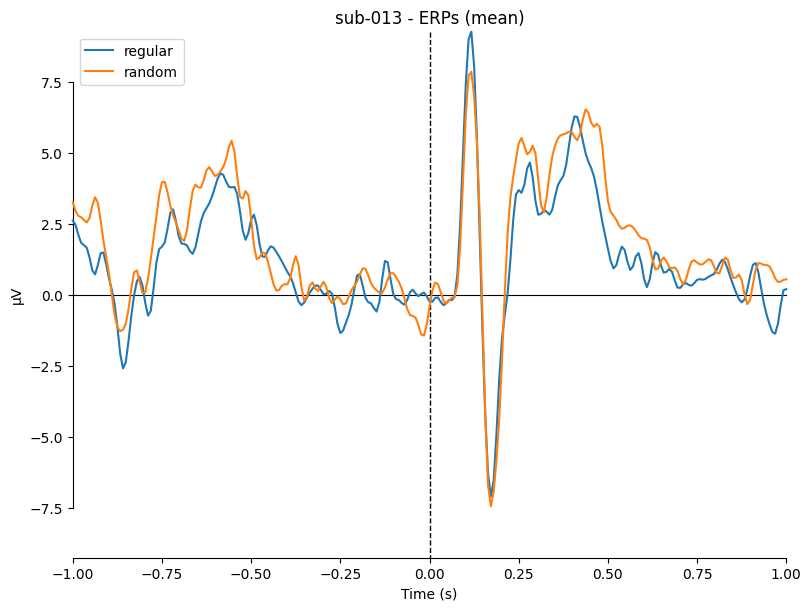

sub-014
combining channels using "mean"
combining channels using "mean"


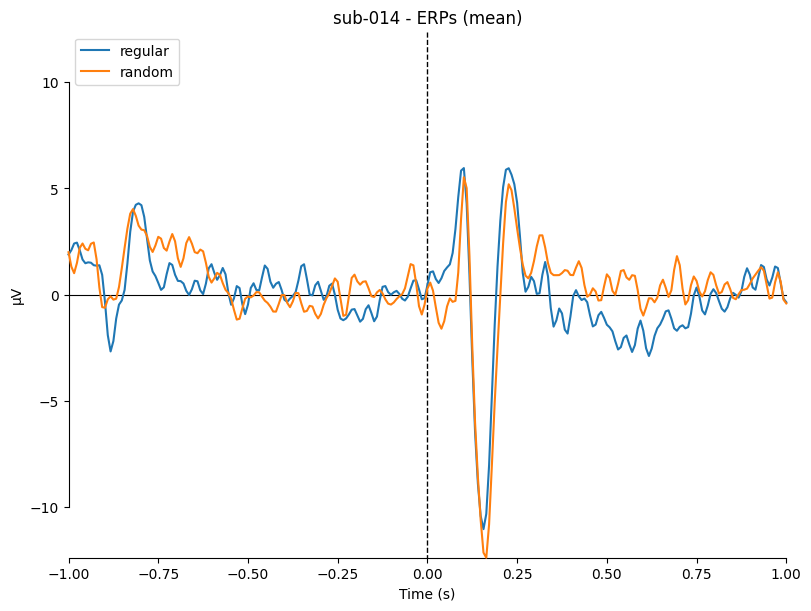

sub-015
combining channels using "mean"
combining channels using "mean"


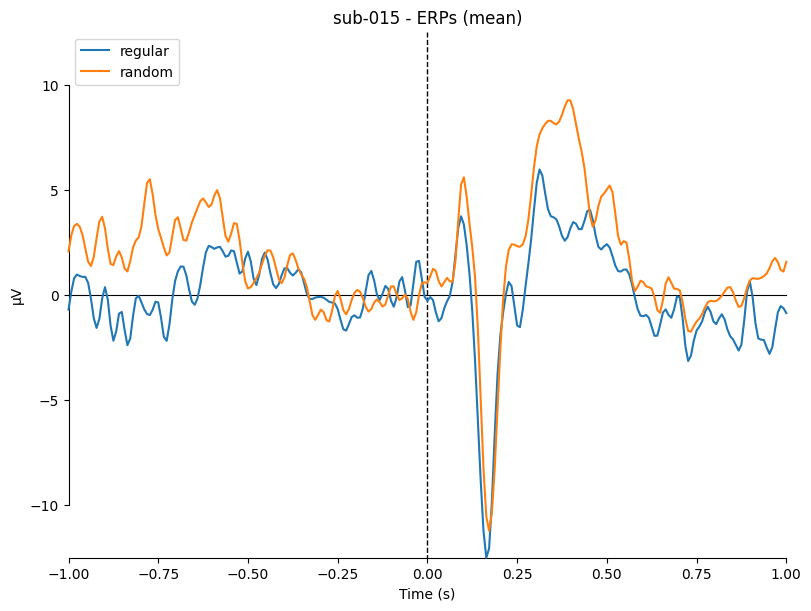

sub-016
combining channels using "mean"
combining channels using "mean"


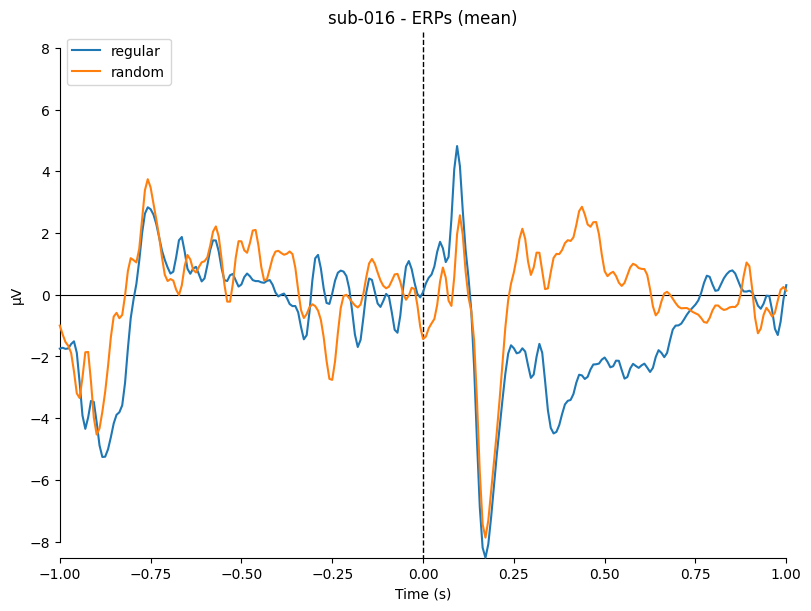

sub-017
combining channels using "mean"
combining channels using "mean"


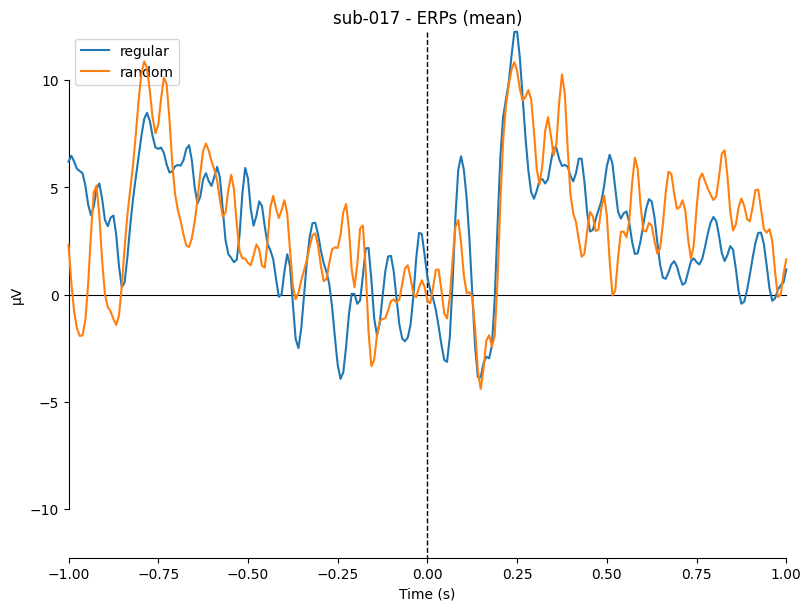

sub-018
combining channels using "mean"
combining channels using "mean"


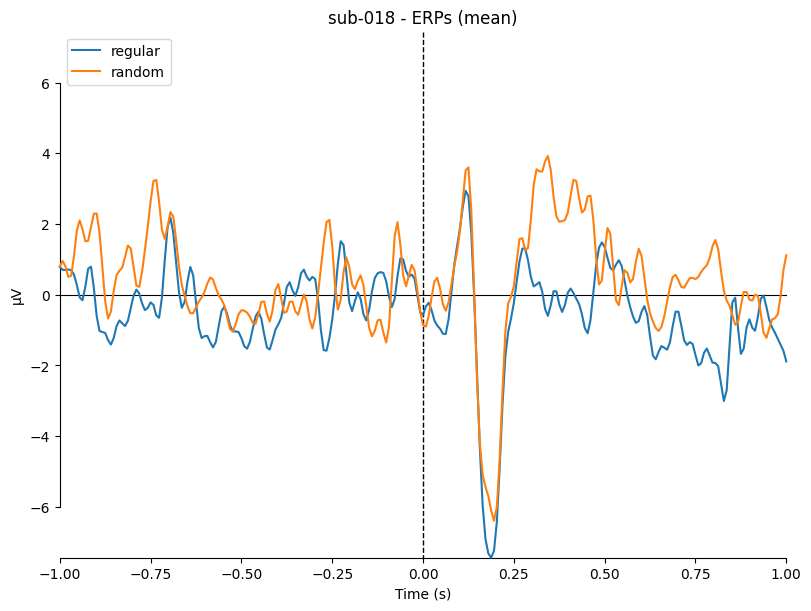

sub-019
combining channels using "mean"
combining channels using "mean"


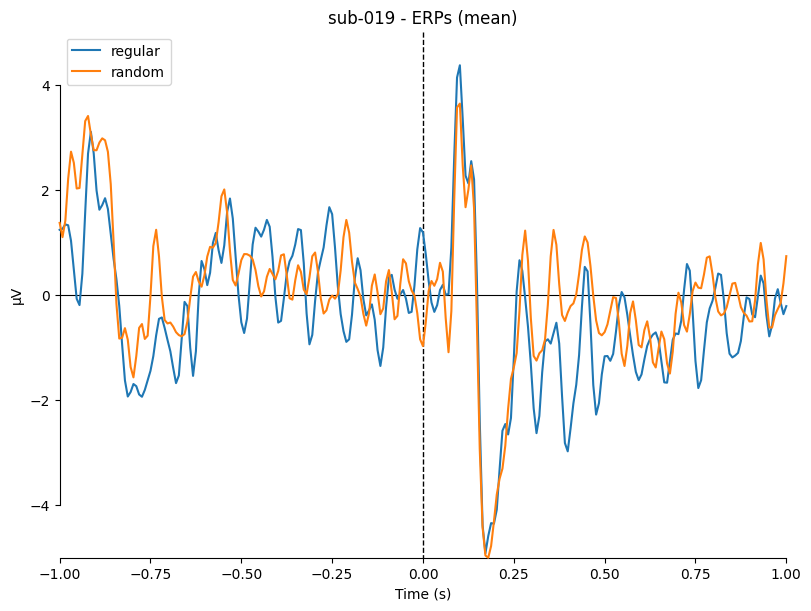

sub-020
combining channels using "mean"
combining channels using "mean"


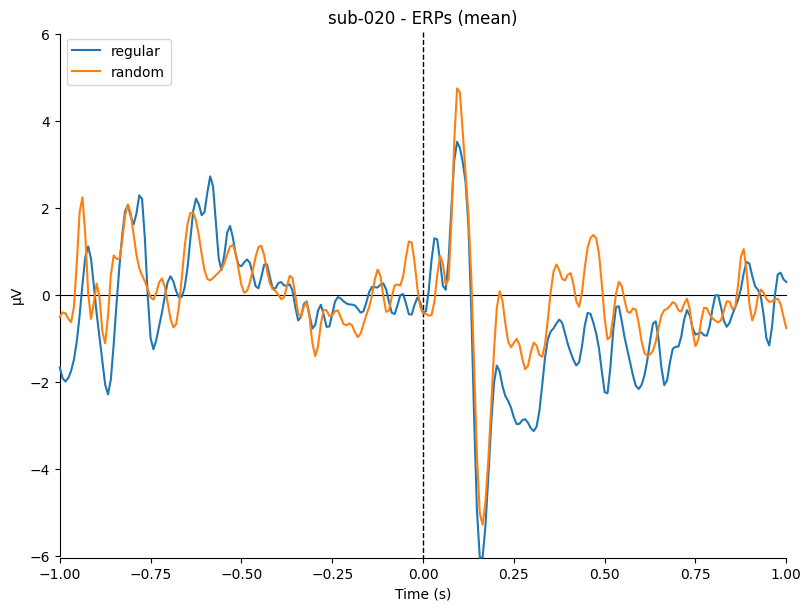

sub-021
combining channels using "mean"
combining channels using "mean"


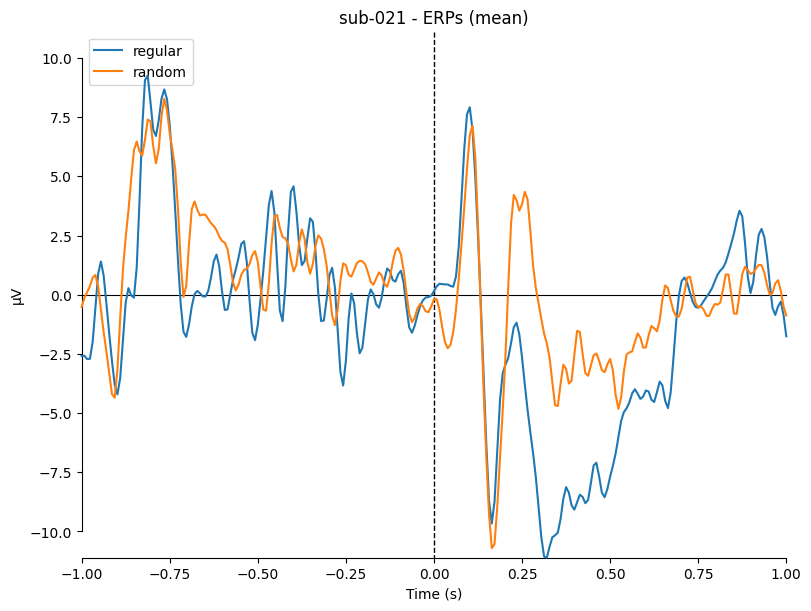

sub-022
combining channels using "mean"
combining channels using "mean"


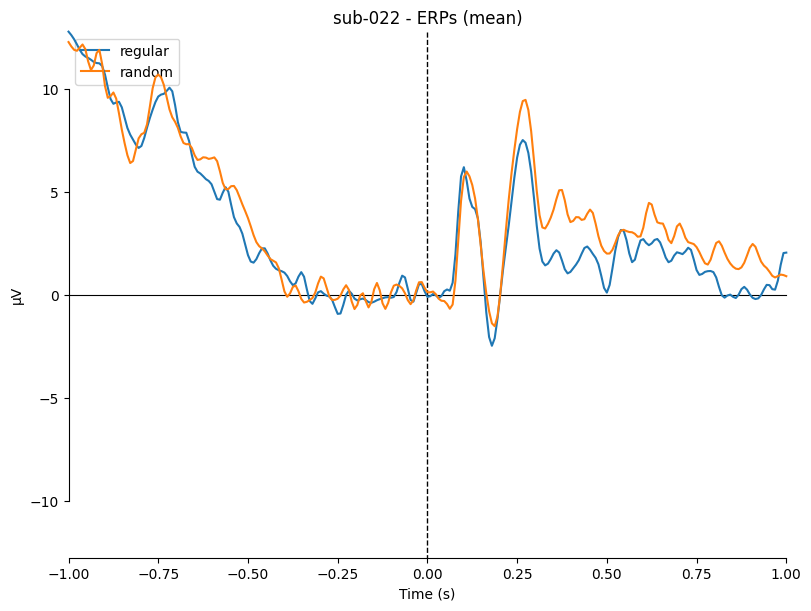

sub-023
combining channels using "mean"
combining channels using "mean"


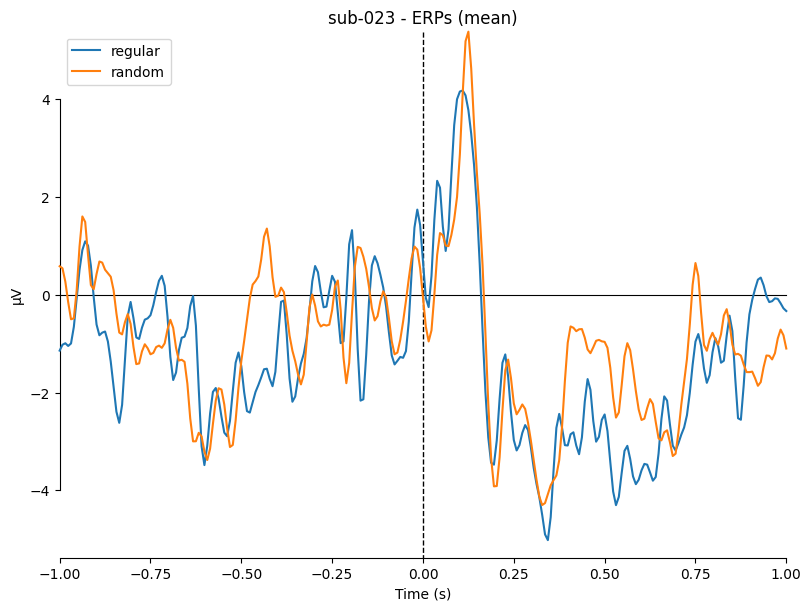

sub-024
combining channels using "mean"
combining channels using "mean"


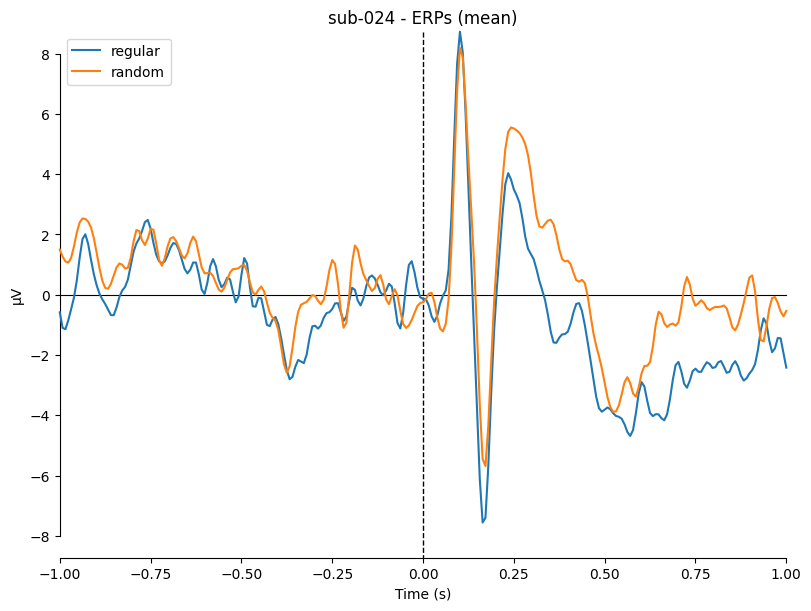

In [10]:

import os
from src.plots import plot_ERPs

for i, sub in enumerate(all_sub_paths):
    sub_name= str(sub)[8:15]
    print(sub_name)
    
    epochs = {
        'regular': sub_epochs['regular'][i],
        'random': sub_epochs['random'][i]
    }

    # plot_ERPs returns a list with only one figure --> fig_list[0]
    fig = plot_ERPs(epochs, title=f'{sub_name} - ERPs')[0]
    
    
    # Define the directory to save the plot
    directory = f'../plots/{sub_name}'

    # Create the directory if it doesn't exist
    os.makedirs(directory, exist_ok=True)

    # Save the plot to a given location
    fig.savefig(f'{directory}/sub-001_ERPs.png')
